In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams[ 'figure.figsize' ] = (10, 8)

In [2]:
train = pd.read_csv( './train_preprocessed.csv', parse_dates = ['timestamp'], index_col = 'timestamp' )
test = pd.read_csv( './test_preprocessed.csv', parse_dates = ['timestamp'], index_col = 'timestamp' )

In [3]:
train.head()

,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,...,ecology,incineration_raion,nuclear_reactor_raion,oil_chemistry_raion,product_type,radiation_raion,railroad_1line,railroad_terminal_raion,thermal_power_plant_raion,water_1line
timestamp,,,,,,,,,,,,,,,,,,,,,
2011-08-20,1.422391,10.918587,13.100618,13.675657,15.156211,18654.0,8945.0,9709.0,23603.0,11317.0,...,0,0,0,0,0,0,0,0,0,0
2011-08-23,9.503405,3.103996,6.444333,8.132640,8.698054,13729.0,6800.0,6929.0,17700.0,8702.0,...,1,0,0,0,0,0,0,0,0,0
2011-08-27,5.604800,2.927487,6.963403,8.054252,9.067885,11252.0,5336.0,5916.0,14884.0,7063.0,...,2,0,0,0,0,1,0,0,0,0
2011-09-01,2.677824,14.606501,17.457198,18.309433,19.487005,24934.0,12152.0,12782.0,32063.0,15550.0,...,0,0,0,0,0,0,0,0,0,0
2011-09-05,11.616653,1.721834,0.046810,0.787593,2.578671,11631.0,5408.0,6223.0,15237.0,7124.0,...,1,0,0,0,0,1,1,1,0,0


In [4]:
def plotPricesPerQuater( data ):
    data[ 'price_per_sqm' ] = data.price_doc / data.full_sq
    colsToPlot = [ 'price_per_sqm', 'Comf_Sec', 'Comf_Prim', 'Low_Sec', 'Eco_Sec', 'Eco_Prim', 'Bus_Sec', 'Bus_Prim' ]
    data[ colsToPlot ].resample( '3M' ).mean().plot() 

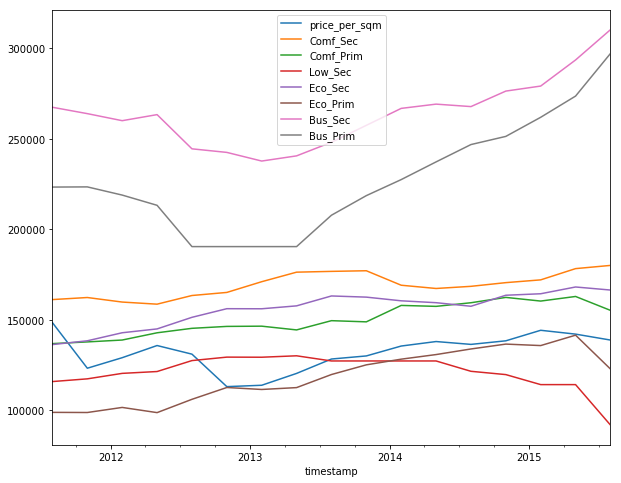

In [5]:
# Строим квартальные графики цен
plotPricesPerQuater( train )

In [6]:
# Смотрим, какие цены выдает наш классификатор на тесте.
model = xgb.Booster( model_file = './model' )
columnsToIgnore = [ 'id' ]
dtest = xgb.DMatrix( test.drop( columnsToIgnore, axis = 1 ).values, feature_names = model.feature_names )
ylog_pred = model.predict( dtest )
test[ 'price_doc' ] = np.exp(ylog_pred) - 1

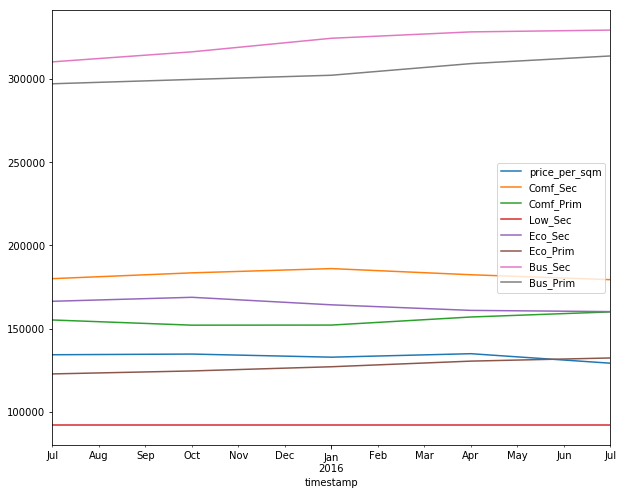

In [7]:
plotPricesPerQuater( test )